# Unsupervised Learning with Principal Component Analysis

**Goals:** 

- What is PCA (Principal Component Analysis)? How it works and how to use it.
- Visualize and interpret PCA-transformed data
- Work with PCA-transformed data for classification and clustering purposes


## Image 1

![a](images/pca_image.jpeg)

## Image 2

![we](images/pca_image_transformed.jpeg)

**What is the difference between the two images???**

**Answer:** The first image is the high-quality version and the second is the low quality. The first is 16MB and the second 1.2MB

<br>

Given that information, is it fair to say that these two images are effectively the same?

## PCA 
---
* Dimension Reductionality technique that when faced with a large set of correlated variables, allow us to summarize this set with a smaller number of representative variables that **collectively** explain most of the variability in the original set.
* The quintessential "dimensionality reduction" algorithm, where _"dimensionality reduction"_ = process of combining or collapsing your existing features (columns in $X$) into new features that retain the signal in the original data in fewer variables while ideally reducing noise.
* **PCA** is an unsupervised approach, since it involves only a set of features $X_1$, $X_2$, . . . , $X_p$, and no associated response $Y$ 
* **PCA** produces derived variables to use in supervised methods and is also a tool for data visualization. Imagine being able to visualize a 100-dimension dataset on a 2D scatter plot.

- Like the two images above the PCA can transform data with 100 dimensions into 2 while retaining the "essence" of the original data. 



* The idea is that each of the $n$ observations lives in $p$-dimensional space, but not all of these dimensions are equally interesting.
* Each of the dimensions found by **PCA** is a linear combination of the $p$ features, so the first principal component of a set of features $X_1$, $X_2$, . . . , $X_p$ is the **normalized** linear combination of the features:
$$Z_1 = φ_{11}X_1 +φ_{21}X_2 +...+φ_{p1}X_p$$
that have the **largest variance**  
The elements $φ_{11}$,...,$φ_{p1}$ are the loadings of the **first** PCA, **AND** together these loadings make up the principal component loading vector whose **SUM** is equal to **1**: $$φ_1 = (φ_{11}  φ_{21} ... φ_{p1})^T$$

### The process
---
* Linearly transform an $𝑁$×$𝑑$ matrix $𝑋$ into an $𝑁$×$𝑚$ matrix $𝑌$
    * Centralized the data (subtract the mean). 
    * Calculate the $𝑑$×$𝑑$ covariance matrix: $$𝐶 = \frac1{N-1} X^T X$$
        * $C_{ij}$ =  $\frac1{N-1}$ $\sum_{q=1}^N$ $X_{q,i}$ $X_{q,i}$ 
        * $C_{i,i}$ (diagonal) is the variance of variable $i$
        * $C_{i,j}$ (off-diagonal) is the covariance between variables $i$ and $j$
    * Calculate the **eigenvectors** of the covariance matrix
         * An **eigenvector** specifies a direction through the original coordinate space. 
    * Select $m$ **eigenvectors** that correspond to the **largest $m$ eigenvalues** to be the new basis.
         * The eigenvector with the highest correspoding **eigenvalue** is the first principal component.
         * **Eigenvalues** indicate the amount of variance in the direction of it's corresponding eigenvector

### Eigenvectors
---
* If $A$ is a **square matrix**, a non-zero vector **$v$** is an **eigenvector** of $A$ if there is a scalar $λ$ **(eigenvalue)** such that $$Av = λv$$

* For example:
$$ Av = 
\left(\begin{array}{cc} 
2 & 3\\
2 & 1
\end{array}\right) *
\left(\begin{array}{cc} 
3 \\ 
2 
\end{array}\right) = 
\left(\begin{array}{cc} 
12 \\
8
\end{array}\right) = 
4
\left(\begin{array}{cc} 
3 \\
2
\end{array}\right)
= λv
$$ 
$~$
* If you think of the squared matrix $A$ as a transformation matrix, then multiply it with the **eigenvector do not change its direction.**

<a href = http://setosa.io/ev/eigenvectors-and-eigenvalues/> Please see Eigenvectors and Eigenvalues Visually </a>

### Visualizing the principal components
---

![](https://snag.gy/ECsJye.jpg)
*Image from Introduction to Statistical Learning*

### Summary
---

* What is a principal component? **Principal components are the vectors that define the new coordinate system for your data.** Transforming your original data columns onto the principal component axes constructs new variables that are optimized to explain as much variance as possible and to be independent (uncorrelated).

* Creating these variables is a well-defined mathematical process, but in essence **each component is created as a weighted sum of your original columns, such that all components are orthogonal (perpendicular) to each other**.

* We can reduce the number of dimensions (remove bottom number of components) and lose the least possible amount of variance information in our data.
* Since we are assuming our variables are interrelated (at least in the sense that they together explain a dependent variable), the information of interest should exist along directions with largest variance.
* The directions of largest variance should have the highest Signal to Noise ratio.
* Correlated predictor variables (also referred to as "redundancy" of information) are combined into independent variables. Our predictors from PCA are guaranteed to be independent.
---
![](https://snag.gy/0Hur9o.jpg)
*Image from http://setosa.io/ev/principal-component-analysis/*

## PCA with Iris, Wine and Digits

We're going to learn how to use PCA with the Iris, Wine and MNIST digits datasets.

In [53]:
#Imports
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.datasets import load_digits

plt.style.use('fivethirtyeight')

### Iris

Let's quick compare the visual differences between the iris dataset and its pca-version

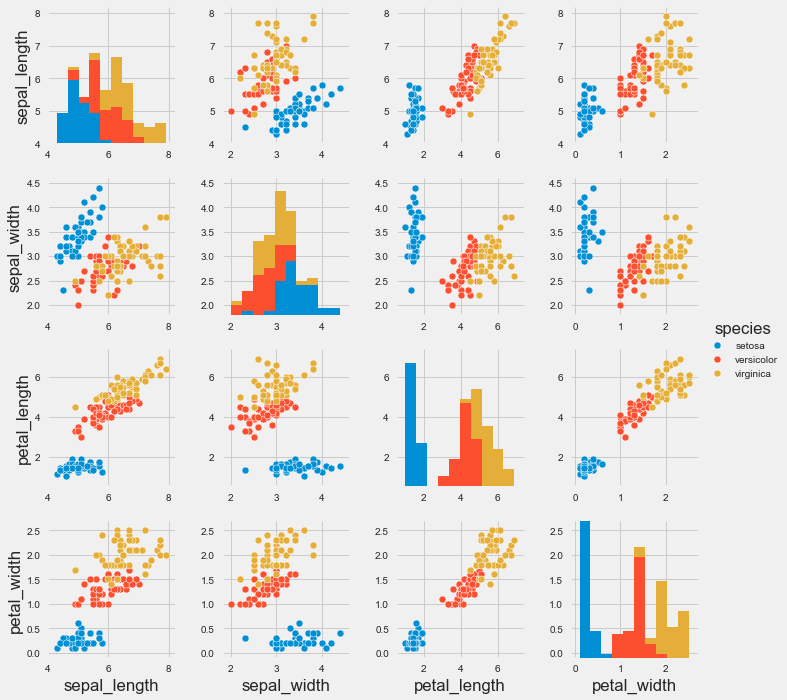

In [25]:
#Load in Iris

iris = sb.load_dataset("iris")

#Pairplot of iris data with species color-encoding

sb.pairplot(iris, hue="species")

As we know, we can't visualize a four-dimensional dataset, the pairplot gives use the next best thing, which is visualizing the four-dimensional dataset from as many different perspectives as possible.

Now let's compare this pairplot with a scatter plot of the iris' data two principal components.

Text(0,0.5,u'Principal Component 2')

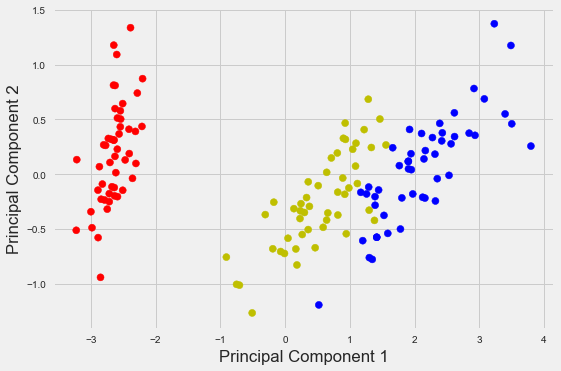

In [29]:
#Initialize pca object with 2 components

pca = PCA(n_components=2)

#Fit and transform iris data without species label using pca
iris_pca = pca.fit_transform(iris.drop("species", axis = 1))


#Make color dictionary for species labels

colors = iris.species.map({"setosa": "r", "virginica":"b", "versicolor": "y"})
#Plot iris_pca

plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c = colors)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

How does this graph compare to the pairplot?

### Wine

In [2]:
#Load in the wine data
wine = pd.read_csv('../data/winequality_merged.csv')

wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


This is a supervised learning classification dataset, the purpose of which is to use attributes of certain types of wine such as density, sulphates, quality to classify wine as either red or not red.

In [3]:
#Assign red_wine column to variable rw 

rw = wine.red_wine

#Drop red_wine from wine

wine.drop("red_wine", axis=1, inplace=True)

First let's examine the correlations between variables

In [4]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


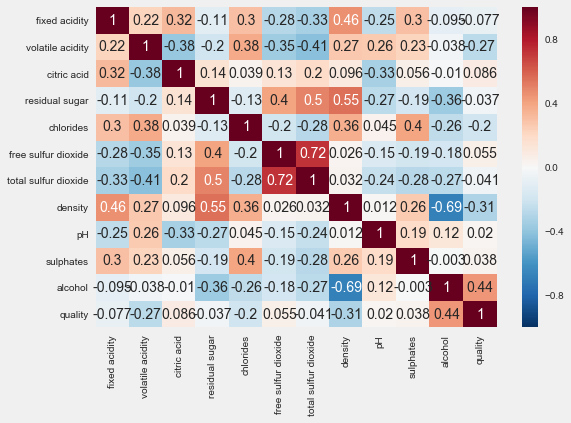

In [6]:
#Correlation heatmap

sb.heatmap(wine.corr(), annot=True)

What do you make of this plot?

One benefit of PCA is that it can deal with multicollinearity pretty well because multicollinearity simply means that you have excess dimensions in your data.

Let's go ahead and transform our data with PCA. But first we have to standardize it.

In [21]:
#Intialize scaler

scale = StandardScaler()

#Fit and transform wine data using standard scaler

wine_s = scale.fit_transform(wine)

In [30]:
#Intialize PCA object
#We're deliberating leaving the n_components parameters alone
pca = PCA()

#Fit and transform wine_s use pca

wine_pca = pca.fit_transform(wine_s)

#Number of components
pca.n_components_

12

We did not reduce any of the dimensions of the dataset because we are going to visualize how much variance is explained by all 12 dimensions.

Plot the variance explained ratio of the components

In [31]:
#Shows the percentage of the variance explained by each component
pca.explained_variance_ratio_

array([ 0.25346226,  0.22082117,  0.13679223,  0.0890521 ,  0.07004171,
        0.05503326,  0.04698554,  0.04299857,  0.03819769,  0.02491774,
        0.01896563,  0.0027321 ])

We're going to plot a bar plot of the explained variance ratios and a line plot of the cumulative sum of the explained variance ratios.

Text(0,0.5,u'Explained Varianced')

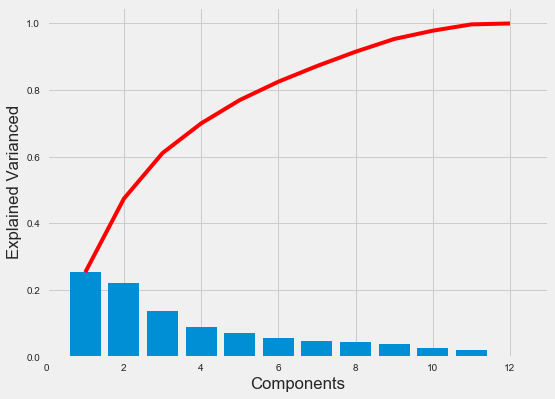

In [36]:
plt.figure(figsize=(8, 6))

components = range(1, pca.n_components_ + 1)

plt.bar(components, pca.explained_variance_ratio_, label = "Explained Variance Ratio")
plt.plot(components, np.cumsum(pca.explained_variance_ratio_), c = "r", label = "Cumulative Sum of Explained Variance ratios")
plt.xlabel("Components")
plt.ylabel("Explained Varianced")

This tell us that if we view this 12-dimension data on a 2D scatter plot then we would be seeing a little under half of the total variance in the dataset.

How do you label the components based on the weights?

Let's print out the component weights with their corresponding variables for PC1, PC2, and PC3

In [37]:
#Component 1
for col, comp in zip(wine.columns, pca.components_[0]):
    print col, comp

fixed acidity -0.256928733111
volatile acidity -0.39493117944
citric acid 0.146460610663
residual sugar 0.318905191475
chlorides -0.313449939668
free sulfur dioxide 0.422691371567
total sulfur dioxide 0.474419684357
density -0.0924375324327
pH -0.20806956646
sulphates -0.29985191609
alcohol -0.0589240827477
quality 0.0874757097877


In [38]:
#Component 2
for col, comp in zip(wine.columns, pca.components_[1]):
    print col, comp

fixed acidity 0.261843062046
volatile acidity 0.105198251341
citric acid 0.144093484947
residual sugar 0.342584967641
chlorides 0.269770095513
free sulfur dioxide 0.111178780564
total sulfur dioxide 0.143947528574
density 0.554920473971
pH -0.152921853598
sulphates 0.1196342033
alcohol -0.49272747405
quality -0.29660090632


In [39]:
#Component 3
for col, comp in zip(wine.columns, pca.components_[2]):
    print col, comp

fixed acidity 0.467486190591
volatile acidity -0.279689315676
citric acid 0.588075565852
residual sugar -0.0755017007908
chlorides 0.0467692077858
free sulfur dioxide -0.0989980148665
total sulfur dioxide -0.101281425438
density -0.0515633823809
pH -0.406787409328
sulphates 0.168691280174
alcohol 0.212931416399
quality 0.295837730114


Now let's see if plotting the first two components color encoded with the rw target variable will allow us to see a difference between the two classes.

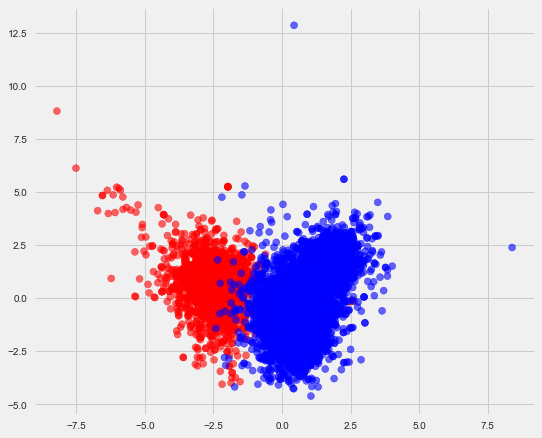

In [49]:
#Create color values from rw
colors = rw.map({0: "b", 1:"r"})

plt.figure(figsize=(8, 7))
plt.scatter(wine_pca[:, 0], wine_pca[:, 1], c=colors, alpha=.6)

What do you make of this chart?

(6497, 12)

**Class exercise:**

- Make a train_test split on the first two components of the wine_pca dataset. Fit a logistic regression model on the training data and evaluate it using accuracy score on the training and testing data.
- Make a confusion matrix comparing and contrasting the labels of the testing dataset and the predictions made on the testing dataset
- Plot a curve of the wine_pca data using components 1 - 12 versus their cross validated accuracy scores.

## Digits

In [55]:
#Load in the mnist digits data


digits = load_digits()
data = digits.data
numbers = digits.target

#shape of data
data.shape

(1797, 64)

Let's PCA the digits data using two components

In [56]:
#Intialize PCA with 2 components
pca = PCA(2)  # project from 64 to 2 dimensions

data_pca = pca.fit_transform(data)

Plot the prinicpal components of the digits dataset using the number labels as the color-encoding

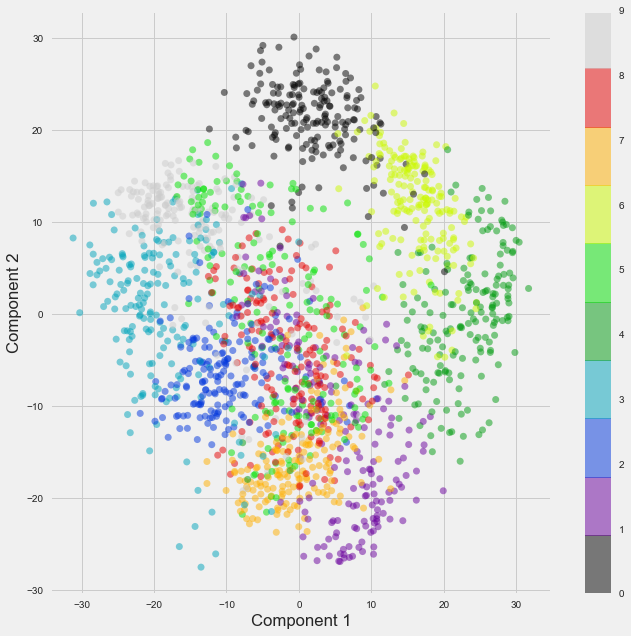

In [58]:

plt.figure(figsize=(10, 10))
plt.scatter(data_pca[:, 0], data_pca[:, 1],
            c=numbers, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar();

In [59]:
#Explained variance of the pca data

pca.explained_variance_ratio_.sum()

0.28509364823699201

2 components gets us about 28.5 of the way there, let's see how many components it takes to get 50, 70, and 90%.

In [63]:
#We can set n_components equal to a explained variance ratio value

#50% EVR
pca = PCA(n_components=.5).fit(data)

#Number components
pca.n_components_

5

In [64]:
#70% EVR
pca = PCA(n_components=.7).fit(data)

#Number components
pca.n_components_

9

In [65]:
#90% EVR
pca = PCA(n_components=.9).fit(data)

#Number components
pca.n_components_

21

Visualize EVR curve

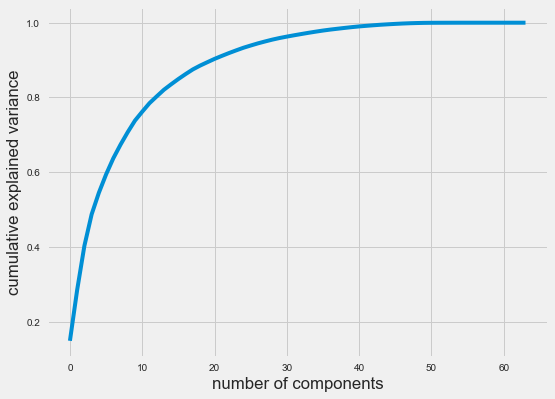

In [62]:
#Intialize and fit digits data using PCA
pca = PCA().fit(data)
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## Resources:

- https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
- https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
- http://setosa.io/ev/principal-component-analysis/
- https://georgemdallas.wordpress.com/2013/10/30/principal-component-analysis-4-dummies-eigenvectors-eigenvalues-and-dimension-reduction/
- https://github.com/viniciuspantoja/tutorial_PCA/blob/master/Tutorial_PCA.ipynb
- http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html
- https://towardsdatascience.com/reducing-dimensionality-from-dimensionality-reduction-techniques-f658aec24dfe
- https://towardsdatascience.com/exploratory-data-analysis-into-the-relationship-between-different-types-of-crime-in-london-20c328e193ff

## In class

1. Use PCA on a supervised learning dataset we've worked with previously to see if PCA-transformed data can produce models as good as the original data.

2. Get started on the homework two assignment.

3. Work on final project.